In [1]:
import torch

In [12]:
import graphs
import models
import utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# import json

# with open('./data/WN18RR/text/valid.txt', 'r') as f:
#     relations = {}
#     for line in f:
#         head, relation, tail = line.split()
#         relations[relation] = ""
        
    
# print(json.dumps(relations), len(relations))

In [4]:
graph = graphs.WN18RR(base_path='./data/WN18RR/text', splits=['train', 'valid','test'], verbose=2)

Loading file train.txt
Data loading progress: [5%]
Data loading progress: [10%]
Data loading progress: [15%]
Data loading progress: [20%]
Data loading progress: [25%]
Data loading progress: [30%]
Data loading progress: [35%]
Data loading progress: [40%]
Data loading progress: [45%]
Data loading progress: [50%]
Data loading progress: [55%]
Data loading progress: [60%]
Data loading progress: [65%]
Data loading progress: [70%]
Data loading progress: [75%]
Data loading progress: [80%]
Data loading progress: [85%]
Data loading progress: [90%]
Loading file valid.txt
Data loading progress: [95%]
Loading file test.txt
Data loading progress: [100%]
Graph was successfully validated!
Building the graph took 22 seconds


In [5]:
graph.sample_english(10, negative = True)

['The word bubble and squeak is part of burhinus',
 'The word sign away is related to domesticate',
 'The word national technical information service is a bald cypress',
 'septobasidiaceae is in or took place in art paper',
 'The word qum is related to murder',
 'The word tidal wave is part of spirit',
 'The word homestead is related to ache',
 'slop is a similar kind of action to deflection',
 'The word energy is a kind of guitar',
 'aldehyde is a similar kind of action to demur']

In [6]:
# graph = graphs.FB15k237(base_path='./data/FB15k-237', splits=['train', 'valid','test'], verbose=2)
# https://www.cs.ubc.ca/~poole/cs532/2021/readings/Sentences2.txt

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [13]:
model_bert = models.BERT(model_id="bert-base-cased", device=device, verbose=1)
model_roberta = models.BERT(model_id="roberta-base", device=device, verbose=1)
model_gpt2 = models.GPT2(model_id="gpt2", device=device, verbose=1)
model_gpt2_large = models.GPT2(model_id="gpt2-large", device=device, verbose=1)

06/03/2022 00:40:46 - INFO - happytransformer.happy_transformer -   Using model: cpu
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
06/03/2022 00:40:55 - INFO - happytransformer.happy_transformer -   Using model: cpu


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

06/03/2022 00:41:25 - INFO - happytransformer.happy_transformer -   Using model: cpu
06/03/2022 00:41:37 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [14]:
p_roberta = model_roberta.experiment(graph, 10, 100)
p_bert = model_bert.experiment(graph, 10, 100)
p_gpt2 = model_gpt2.experiment(graph, 10, 100)
p_gpt2_large = model_gpt2_large.experiment(graph, 10, 100)

[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:24<00:00,  3.24s/it]


[BERT_roberta-base] Final average perplexity: 10.78476599574089
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:40<00:00,  3.40s/it]


[BERT_roberta-base] Final average perplexity: 37.34951154232025
The power of BERT_roberta-base on WN18RR (100 samples) is: [1.8014830916470984e-06]
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:20<00:00,  3.21s/it]


[BERT_roberta-base] Final average perplexity: 11.119793803691865
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:46<00:00,  3.46s/it]


[BERT_roberta-base] Final average perplexity: 33.54098469018936
The power of BERT_roberta-base on WN18RR (100 samples) is: [1.627468685174657e-07]
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:23<00:00,  3.23s/it]


[BERT_roberta-base] Final average perplexity: 12.780212709903717
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:36<00:00,  3.37s/it]


[BERT_roberta-base] Final average perplexity: 24.665364770889283
The power of BERT_roberta-base on WN18RR (100 samples) is: [1.437679725367442e-06]
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:23<00:00,  3.24s/it]


[BERT_roberta-base] Final average perplexity: 10.209223356246948
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:30<00:00,  3.30s/it]


[BERT_roberta-base] Final average perplexity: 44.895088317394254
The power of BERT_roberta-base on WN18RR (100 samples) is: [6.348559160717892e-07]
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:48<00:00,  3.48s/it]


[BERT_roberta-base] Final average perplexity: 11.705704975128175
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:46<00:00,  3.46s/it]


[BERT_roberta-base] Final average perplexity: 33.28187705993653
The power of BERT_roberta-base on WN18RR (100 samples) is: [1.1080528811541643e-05]
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:12<00:00,  3.13s/it]


[BERT_roberta-base] Final average perplexity: 11.04013275384903
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:29<00:00,  3.30s/it]


[BERT_roberta-base] Final average perplexity: 28.464733014106752
The power of BERT_roberta-base on WN18RR (100 samples) is: [2.540864612751671e-07]
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:24<00:00,  3.24s/it]


[BERT_roberta-base] Final average perplexity: 11.536682804822922
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:33<00:00,  3.34s/it]


[BERT_roberta-base] Final average perplexity: 48.50934769868851
The power of BERT_roberta-base on WN18RR (100 samples) is: [0.0001089464846417844]
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:29<00:00,  3.30s/it]


[BERT_roberta-base] Final average perplexity: 11.347634426355363
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:46<00:00,  3.47s/it]


[BERT_roberta-base] Final average perplexity: 27.168277664184572
The power of BERT_roberta-base on WN18RR (100 samples) is: [5.028971964252379e-06]
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:34<00:00,  3.35s/it]


[BERT_roberta-base] Final average perplexity: 16.368450345993043
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:48<00:00,  3.49s/it]


[BERT_roberta-base] Final average perplexity: 28.65379721045494
The power of BERT_roberta-base on WN18RR (100 samples) is: [0.0013610815292947299]
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:40<00:00,  3.40s/it]


[BERT_roberta-base] Final average perplexity: 9.51863374710083
[BERT_roberta-base] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:45<00:00,  3.46s/it]


[BERT_roberta-base] Final average perplexity: 25.970636327266693
The power of BERT_roberta-base on WN18RR (100 samples) is: [2.8365728705132254e-08]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:19<00:00,  3.19s/it]


[BERT_bert-base-cased] Final average perplexity: 7.930311353206634
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:26<00:00,  3.27s/it]


[BERT_bert-base-cased] Final average perplexity: 14.329807531833648
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [2.8020855654313685e-05]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:07<00:00,  3.08s/it]


[BERT_bert-base-cased] Final average perplexity: 8.506429038047791
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:13<00:00,  3.13s/it]


[BERT_bert-base-cased] Final average perplexity: 16.517537652254106
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [0.00014197123511380412]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:16<00:00,  3.16s/it]


[BERT_bert-base-cased] Final average perplexity: 8.557455307245254
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:15<00:00,  3.15s/it]


[BERT_bert-base-cased] Final average perplexity: 16.590720804929735
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [0.0020726152150215334]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [04:56<00:00,  2.96s/it]


[BERT_bert-base-cased] Final average perplexity: 7.622562695741653
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:13<00:00,  3.14s/it]


[BERT_bert-base-cased] Final average perplexity: 16.079608166217803
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [1.307410469960596e-05]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:06<00:00,  3.07s/it]


[BERT_bert-base-cased] Final average perplexity: 6.582156366109848
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:18<00:00,  3.19s/it]


[BERT_bert-base-cased] Final average perplexity: 14.44720531463623
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [6.011171976307082e-07]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:00<00:00,  3.01s/it]


[BERT_bert-base-cased] Final average perplexity: 7.692633539438248
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:14<00:00,  3.15s/it]


[BERT_bert-base-cased] Final average perplexity: 18.562341105937957
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [0.009671182359854077]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [04:58<00:00,  2.99s/it]


[BERT_bert-base-cased] Final average perplexity: 6.712169582843781
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:13<00:00,  3.14s/it]


[BERT_bert-base-cased] Final average perplexity: 15.195136655569076
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [1.1607886912414553e-06]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [04:57<00:00,  2.98s/it]


[BERT_bert-base-cased] Final average perplexity: 7.725391390323639
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:23<00:00,  3.23s/it]


[BERT_bert-base-cased] Final average perplexity: 23.984086453914642
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [0.00045780535746826385]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [04:58<00:00,  2.98s/it]


[BERT_bert-base-cased] Final average perplexity: 6.542204854488372
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:28<00:00,  3.29s/it]


[BERT_bert-base-cased] Final average perplexity: 17.716494765281677
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [5.447298681188493e-06]
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:01<00:00,  3.01s/it]


[BERT_bert-base-cased] Final average perplexity: 9.507155536413192
[BERT_bert-base-cased] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [05:25<00:00,  3.25s/it]


[BERT_bert-base-cased] Final average perplexity: 13.801319813728332
The power of BERT_bert-base-cased on WN18RR (100 samples) is: [0.03380851271584999]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:44<00:00,  2.25s/it]


[gpt2] Final average perplexity: 105.14107389450074
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:38<00:00,  2.19s/it]


[gpt2] Final average perplexity: 264.9877550888061
The power of GPT2_gpt2 on WN18RR (100 samples) is: [1.6604375662784195e-10]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:30<00:00,  2.11s/it]


[gpt2] Final average perplexity: 136.8600878715515
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:37<00:00,  2.18s/it]


[gpt2] Final average perplexity: 254.2588963699341
The power of GPT2_gpt2 on WN18RR (100 samples) is: [2.1031059156488774e-06]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:32<00:00,  2.13s/it]


[gpt2] Final average perplexity: 102.2291907119751
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:38<00:00,  2.19s/it]


[gpt2] Final average perplexity: 240.2116915130615
The power of GPT2_gpt2 on WN18RR (100 samples) is: [5.276920692177161e-09]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:43<00:00,  2.23s/it]


[gpt2] Final average perplexity: 120.60487859725953
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:41<00:00,  2.21s/it]


[gpt2] Final average perplexity: 248.3189743423462
The power of GPT2_gpt2 on WN18RR (100 samples) is: [5.760071648322395e-08]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:33<00:00,  2.14s/it]


[gpt2] Final average perplexity: 120.76878910064697
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:37<00:00,  2.18s/it]


[gpt2] Final average perplexity: 271.9779581832886
The power of GPT2_gpt2 on WN18RR (100 samples) is: [1.2318150000772744e-09]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:33<00:00,  2.14s/it]


[gpt2] Final average perplexity: 131.4051172065735
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:42<00:00,  2.23s/it]


[gpt2] Final average perplexity: 244.4272982788086
The power of GPT2_gpt2 on WN18RR (100 samples) is: [2.0129428168731683e-06]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:25<00:00,  2.06s/it]


[gpt2] Final average perplexity: 108.53315044403077
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:39<00:00,  2.20s/it]


[gpt2] Final average perplexity: 236.61504035949707
The power of GPT2_gpt2 on WN18RR (100 samples) is: [3.8853178472387463e-08]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:44<00:00,  2.25s/it]


[gpt2] Final average perplexity: 110.91892988204955
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:44<00:00,  2.25s/it]


[gpt2] Final average perplexity: 231.87865703582764
The power of GPT2_gpt2 on WN18RR (100 samples) is: [5.679031670300344e-09]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:39<00:00,  2.19s/it]


[gpt2] Final average perplexity: 128.71190700531005
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:44<00:00,  2.24s/it]


[gpt2] Final average perplexity: 262.4229849243164
The power of GPT2_gpt2 on WN18RR (100 samples) is: [2.7092607960722905e-09]
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:36<00:00,  2.16s/it]


[gpt2] Final average perplexity: 120.11501462936401
[gpt2] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [03:45<00:00,  2.26s/it]


[gpt2] Final average perplexity: 269.4562979888916
The power of GPT2_gpt2 on WN18RR (100 samples) is: [4.783449932503884e-07]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:31<00:00,  5.71s/it]


[gpt2-large] Final average perplexity: 88.68714023590088
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [10:34<00:00,  6.35s/it]


[gpt2-large] Final average perplexity: 198.3176099395752
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [4.5605785245550474e-10]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:37<00:00,  5.77s/it]


[gpt2-large] Final average perplexity: 94.76484741210938
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [10:12<00:00,  6.13s/it]


[gpt2-large] Final average perplexity: 215.50657917022704
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [5.934364137545522e-09]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:42<00:00,  5.82s/it]


[gpt2-large] Final average perplexity: 99.8258828163147
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [10:12<00:00,  6.12s/it]


[gpt2-large] Final average perplexity: 197.05186338424681
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [2.4035290283326313e-08]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:33<00:00,  5.73s/it]


[gpt2-large] Final average perplexity: 106.10086650848389
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:27<00:00,  5.67s/it]


[gpt2-large] Final average perplexity: 196.9688438606262
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [1.663230042189825e-06]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:51<00:00,  5.92s/it]


[gpt2-large] Final average perplexity: 84.04429103851318
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [10:24<00:00,  6.24s/it]


[gpt2-large] Final average perplexity: 189.95933629989625
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [1.6929017173089404e-08]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:59<00:00,  5.99s/it]


[gpt2-large] Final average perplexity: 88.21328351974488
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:55<00:00,  5.96s/it]


[gpt2-large] Final average perplexity: 208.18797843933106
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [1.1063248558545315e-09]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:21<00:00,  5.62s/it]


[gpt2-large] Final average perplexity: 86.4182886505127
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [10:00<00:00,  6.00s/it]


[gpt2-large] Final average perplexity: 201.99212032318115
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [7.28010950980357e-12]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:00<00:00,  5.40s/it]


[gpt2-large] Final average perplexity: 102.01259660720825
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [10:02<00:00,  6.03s/it]


[gpt2-large] Final average perplexity: 193.02135578155517
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [4.3085108263151995e-07]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:34<00:00,  5.74s/it]


[gpt2-large] Final average perplexity: 86.31995344161987
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [10:06<00:00,  6.06s/it]


[gpt2-large] Final average perplexity: 190.20263027191163
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [4.0995414623473205e-11]
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [09:39<00:00,  5.80s/it]


[gpt2-large] Final average perplexity: 75.52247683525086
[gpt2-large] Calculating perplexity for 100 samples


100%|█████████████████████████████████████████| 100/100 [10:13<00:00,  6.13s/it]

[gpt2-large] Final average perplexity: 218.0184139251709
The power of GPT2_gpt2-large on WN18RR (100 samples) is: [6.385027232207237e-08]


BERT_bert-base-cased_WN18RR [2.8020855654313685e-05, 0.00014197123511380412, 0.0020726152150215334, 1.307410469960596e-05, 6.011171976307082e-07, 0.009671182359854077, 1.1607886912414553e-06, 0.00045780535746826385, 5.447298681188493e-06, 0.03380851271584999]
BERT_roberta-base_WN18RR [1.8014830916470984e-06, 1.627468685174657e-07, 1.437679725367442e-06, 6.348559160717892e-07, 1.1080528811541643e-05, 2.540864612751671e-07, 0.0001089464846417844, 5.028971964252379e-06, 0.0013610815292947299, 2.8365728705132254e-08]
GPT2_gpt2_WN18RR [1.6604375662784195e-10, 2.1031059156488774e-06, 5.276920692177161e-09, 5.760071648322395e-08, 1.2318150000772744e-09, 2.0129428168731683e-06, 3.8853178472387463e-08, 5.679031670300344e-09, 2.7092607960722905e-09, 4.783449932503884e-07]
GPT2_gpt2-large_WN18RR [4.5605785245550474e-10, 5.934364137545522e-09, 2.4035290283326313e-08, 1.663230042189825e-06, 1.6929017173089404e-08, 1.1063248558545315e-09, 7.28010950980357e-12, 4.3085108263151995e-07, 4.0995414623473

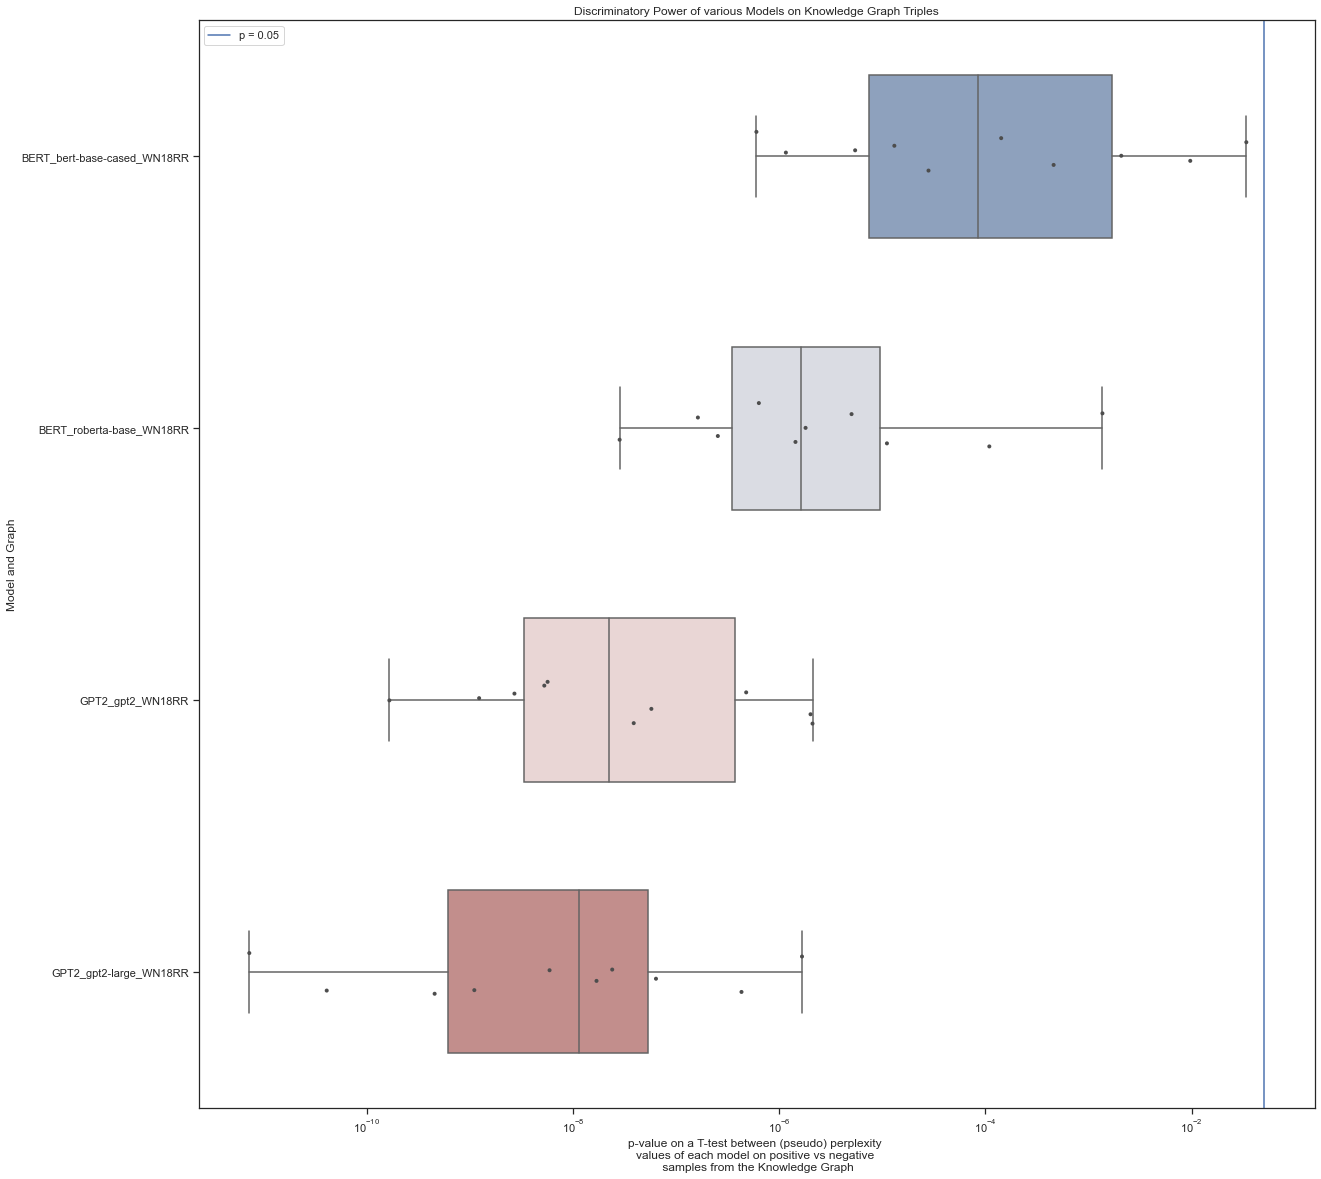

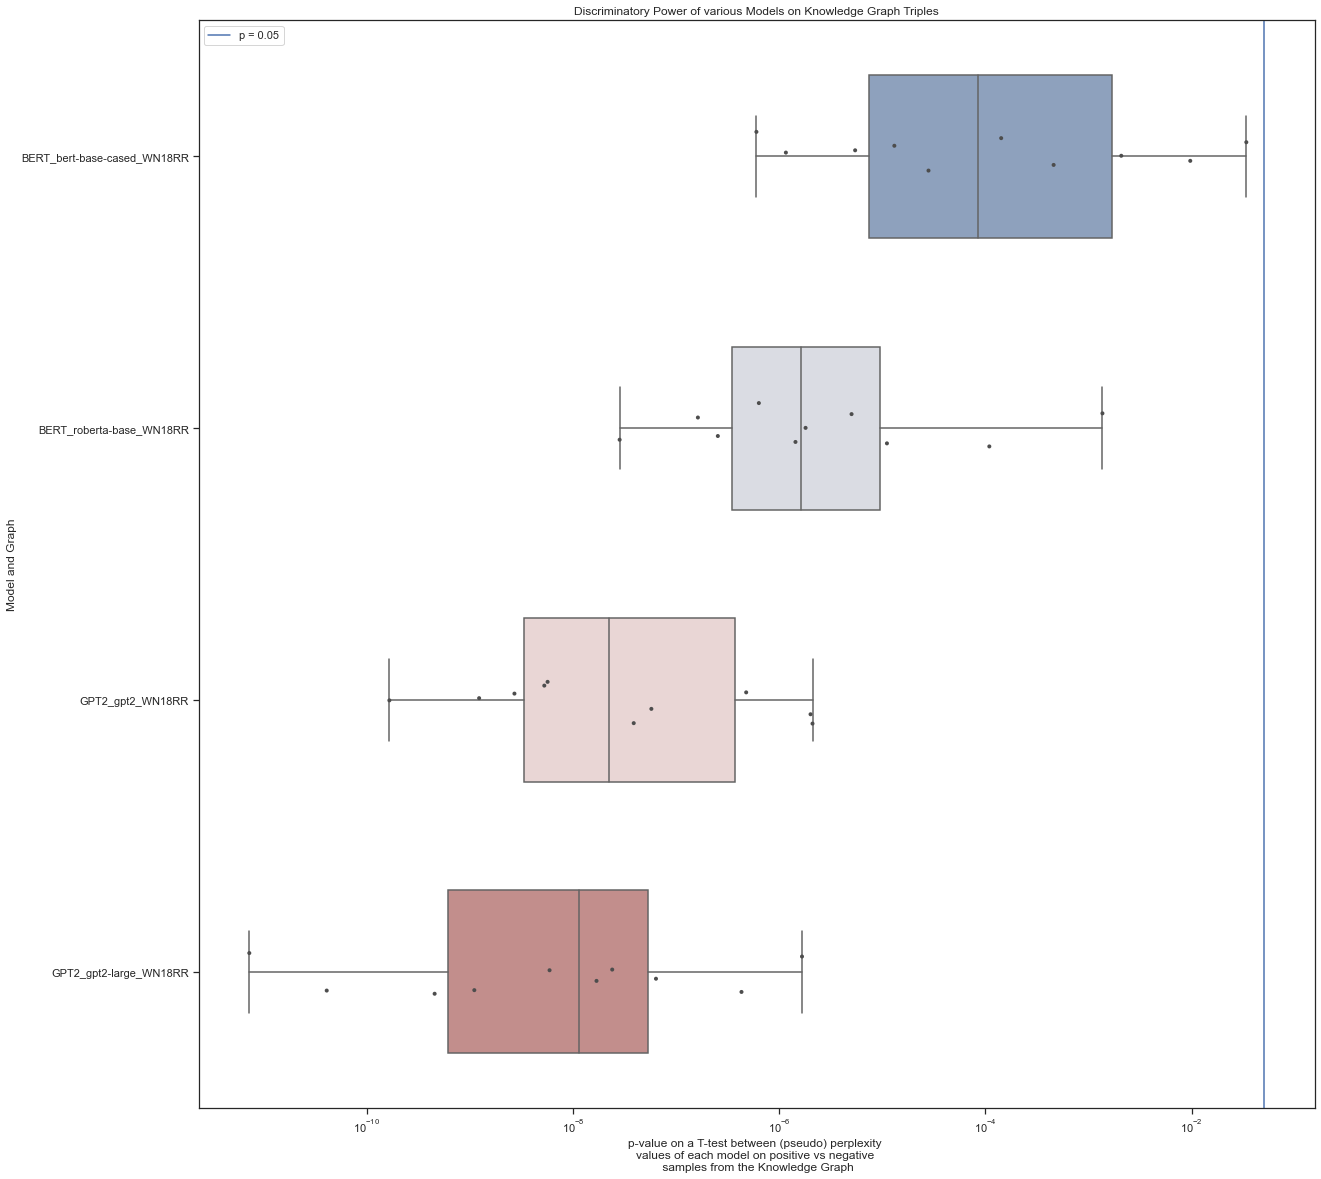

In [18]:
utils.plot_results([("BERT_bert-base-cased", "WN18RR"),('BERT_roberta-base', 'WN18RR'), ('GPT2_gpt2', 'WN18RR'), ('GPT2_gpt2-large', 'WN18RR')], 10, 100)


